In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
data = pd.read_csv("../../Data/world_happiness_report/world-happiness-report.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [3]:
data_2021 = pd.read_csv("../../Data/world_happiness_report/world-happiness-report-2021.csv")
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
print(data_2021.shape)
data_2021.head()

(149, 20)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
print(data.shape)
data.head()

(1949, 11)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [7]:
data_2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

<AxesSubplot:>

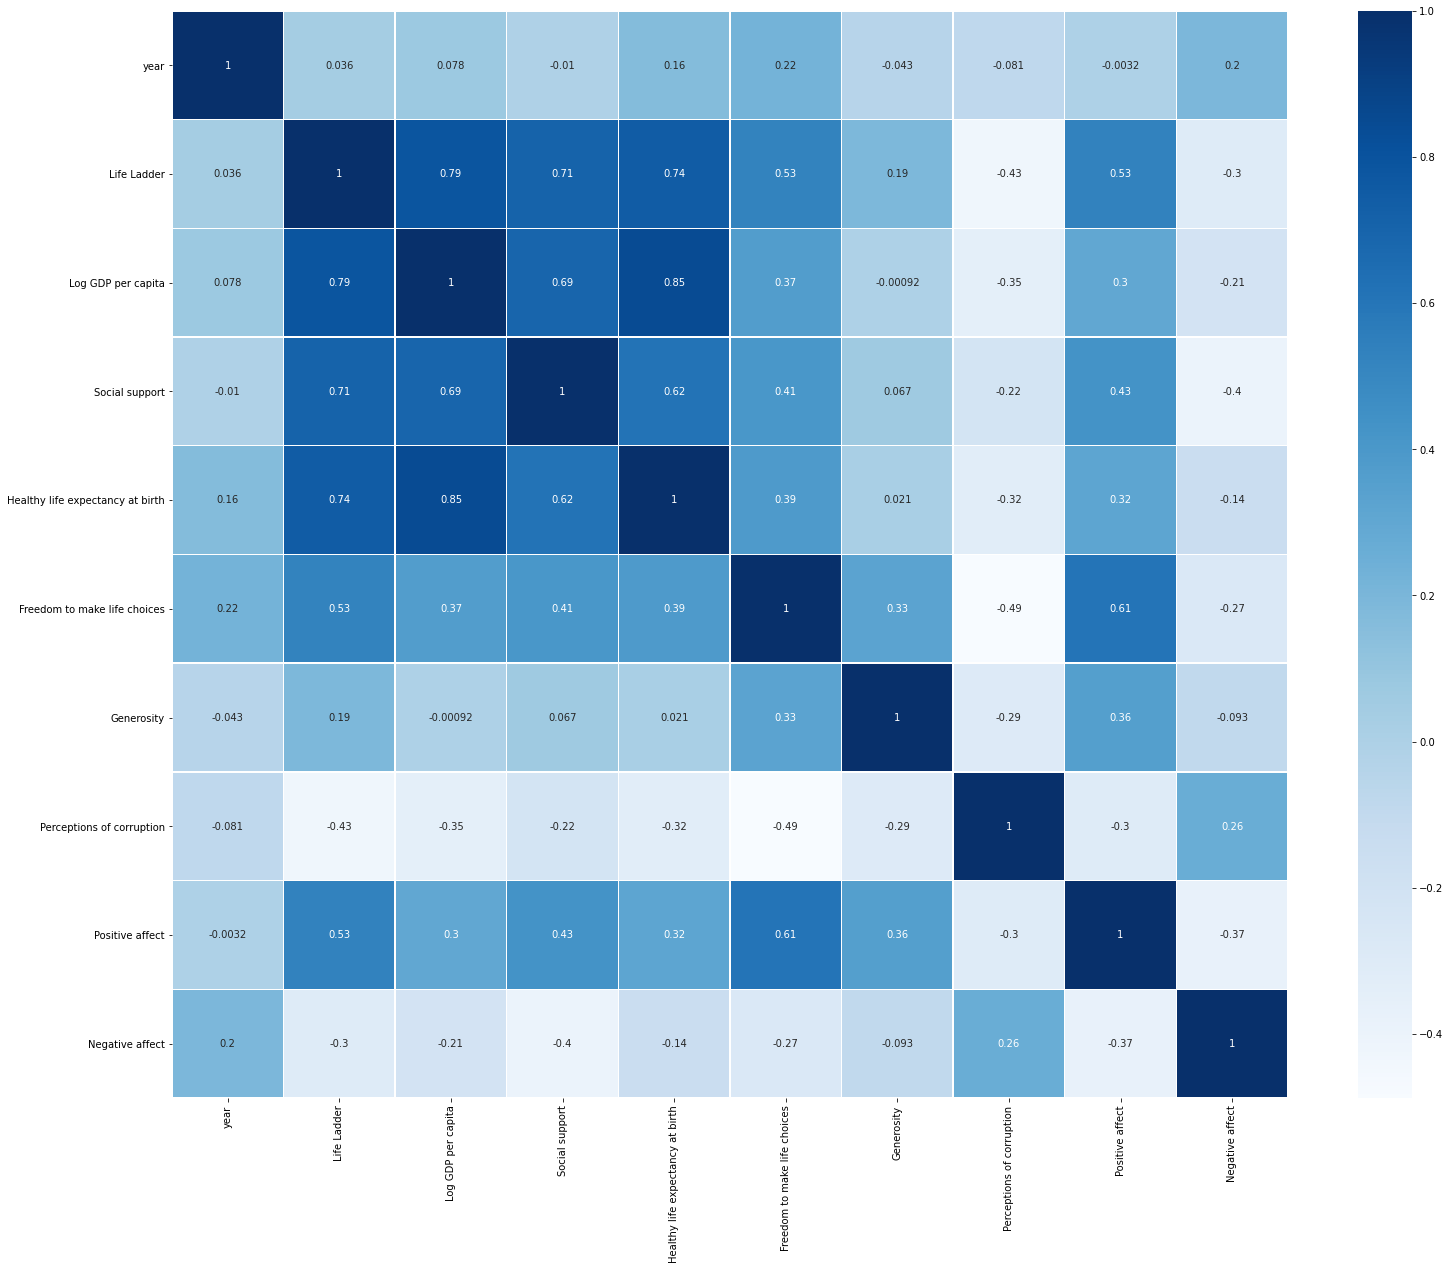

In [8]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), cmap='Blues',linewidths=.5,annot=True)

<AxesSubplot:>

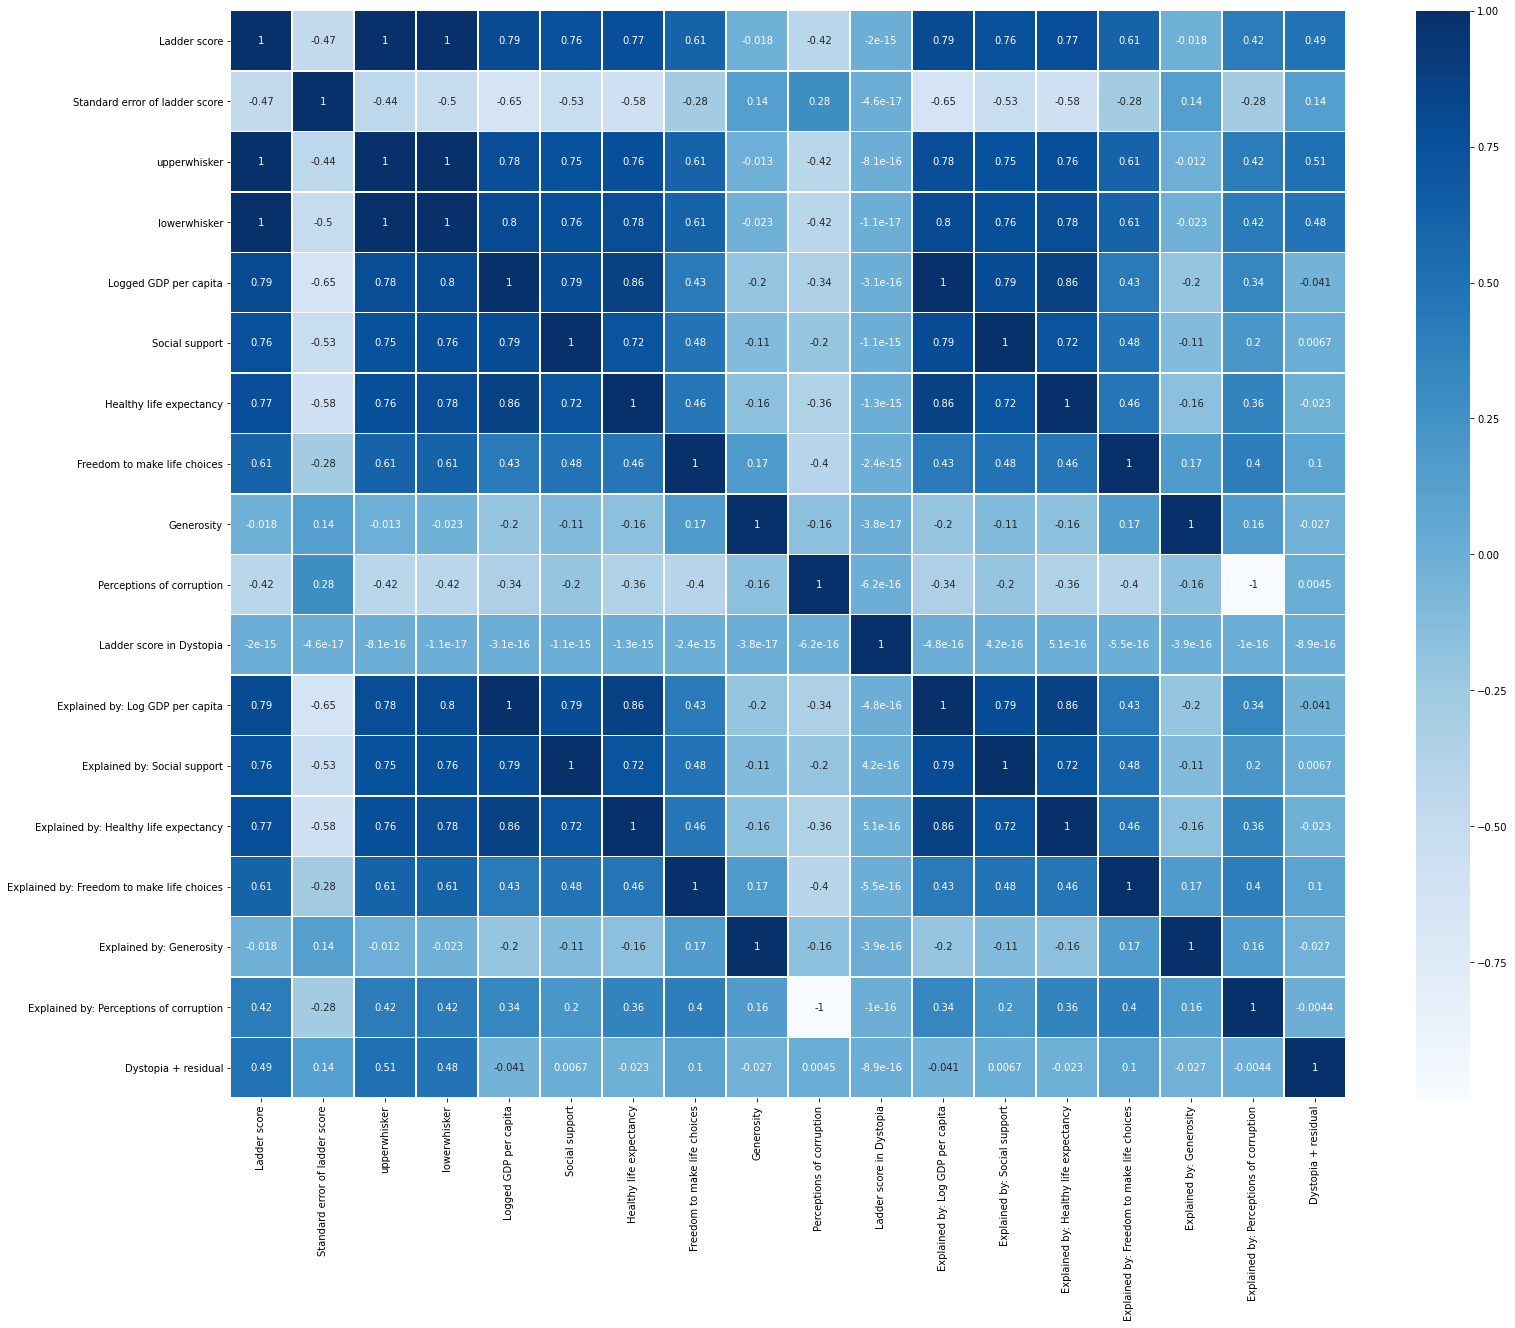

In [9]:
plt.figure(figsize=(25,20))
sns.heatmap(data_2021.corr(), cmap='Blues',linewidths=.5,annot=True)

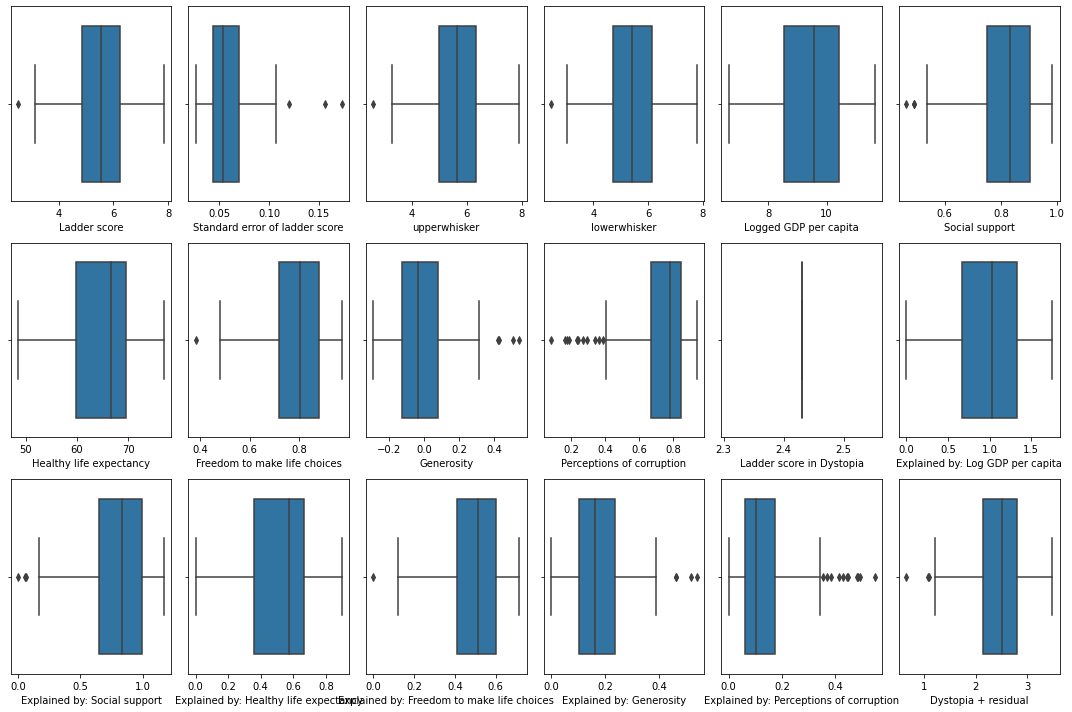

In [10]:
fig, ax=plt.subplots(3,6, figsize=(15,10)) # Creates a grid of 3 rows and 6 colums as we have 18 numeric columns.
numeric_col=data_2021.select_dtypes('float64').columns # For selecting perticuler datatype
for num_col, axis in zip(numeric_col, ax.ravel()): # ax.ravel() kind of flattens the 2d grid we created, for iteration
    sns.boxplot(x=num_col, data=data_2021, ax=axis)
plt.tight_layout()

In [11]:
y=data_2021['Ladder score']
y

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

In [12]:
X = data_2021.loc[:,['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']]
X

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,10.775,0.954,72.000,0.949,-0.098,0.186,2.43
1,10.933,0.954,72.700,0.946,0.030,0.179,2.43
2,11.117,0.942,74.400,0.919,0.025,0.292,2.43
3,10.878,0.983,73.000,0.955,0.160,0.673,2.43
4,10.932,0.942,72.400,0.913,0.175,0.338,2.43
...,...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915,2.43
145,9.782,0.784,59.269,0.824,-0.246,0.801,2.43
146,7.676,0.552,61.400,0.897,0.061,0.167,2.43
147,7.943,0.750,56.201,0.677,-0.047,0.821,2.43


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

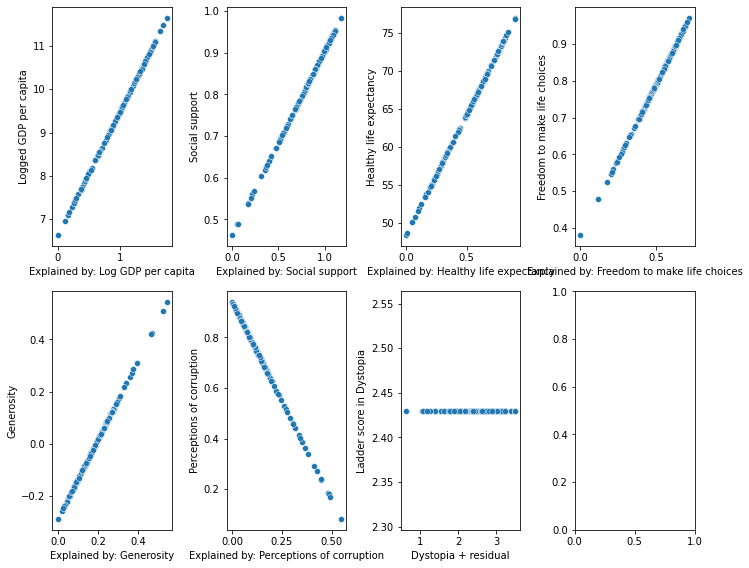

In [14]:
prior_col=['Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual']
col_to_consider=['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']
X= data_2021[col_to_consider]
fig, ax=plt.subplots(2,4, figsize=(10,8))
for prior_col, after_col, axis in zip(prior_col, col_to_consider, ax.ravel()):
    sns.scatterplot(x=prior_col, y=after_col, data=data_2021, ax=axis)
plt.tight_layout()

In [16]:
rfr = RandomForestRegressor()
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rfr, param_grid=params_rf, cv=5)
grid_rf.fit(x_train, y_train)
print("Best parameters for RandomForestClassifier:", grid_rf.best_params_)

Best parameters for RandomForestClassifier: {'min_samples_leaf': 2, 'n_estimators': 200}


In [68]:
random_forest= RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=20, min_samples_split=2).fit(X,y)
random_forest.fit(x_train,y_train)
print(random_forest.score(x_test,y_test))
print(y_test.iloc[0],y_test.iloc[1])
random_forest.predict(np.array([x_test[0],x_test[1]]))


0.7275636407470971
6.14 5.306


array([5.819568  , 4.41290327])

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.6604379694878013


In [78]:
#Deep Learning
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=8,input_shape=(1,7),activation='relu'),
     tf.keras.layers.Dense(units=12,activation="relu"),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(units=1,activation="relu")
    ])
model.compile(optimizer='adam',
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['accuracy'])

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1, 8)              64        
_________________________________________________________________
dense_35 (Dense)             (None, 1, 12)             108       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 12)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 1, 1)              13        
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(x_train, y_train,batch_size=100,epochs=600,verbose=2,shuffle=True)
model.evaluate(x_test,y_test)

Epoch 1/600
2/2 - 0s - loss: 29.3813 - accuracy: 0.0000e+00
Epoch 2/600
2/2 - 0s - loss: 29.2844 - accuracy: 0.0000e+00
Epoch 3/600
2/2 - 0s - loss: 29.1404 - accuracy: 0.0000e+00
Epoch 4/600
2/2 - 0s - loss: 28.9508 - accuracy: 0.0000e+00
Epoch 5/600
2/2 - 0s - loss: 28.8007 - accuracy: 0.0000e+00
Epoch 6/600
2/2 - 0s - loss: 28.3525 - accuracy: 0.0000e+00
Epoch 7/600
2/2 - 0s - loss: 28.2587 - accuracy: 0.0000e+00
Epoch 8/600
2/2 - 0s - loss: 28.2033 - accuracy: 0.0000e+00
Epoch 9/600
2/2 - 0s - loss: 28.1374 - accuracy: 0.0000e+00
Epoch 10/600
2/2 - 0s - loss: 28.0775 - accuracy: 0.0000e+00
Epoch 11/600
2/2 - 0s - loss: 27.6041 - accuracy: 0.0000e+00
Epoch 12/600
2/2 - 0s - loss: 27.4389 - accuracy: 0.0000e+00
Epoch 13/600
2/2 - 0s - loss: 27.3386 - accuracy: 0.0000e+00
Epoch 14/600
2/2 - 0s - loss: 27.0035 - accuracy: 0.0000e+00
Epoch 15/600
2/2 - 0s - loss: 26.5381 - accuracy: 0.0000e+00
Epoch 16/600
2/2 - 0s - loss: 26.4317 - accuracy: 0.0000e+00
Epoch 17/600
2/2 - 0s - loss: 26.

Epoch 130/600
2/2 - 0s - loss: 2.5945 - accuracy: 0.0000e+00
Epoch 131/600
2/2 - 0s - loss: 2.4345 - accuracy: 0.0000e+00
Epoch 132/600
2/2 - 0s - loss: 2.7426 - accuracy: 0.0000e+00
Epoch 133/600
2/2 - 0s - loss: 2.1472 - accuracy: 0.0000e+00
Epoch 134/600
2/2 - 0s - loss: 2.4879 - accuracy: 0.0000e+00
Epoch 135/600
2/2 - 0s - loss: 2.4020 - accuracy: 0.0000e+00
Epoch 136/600
2/2 - 0s - loss: 2.5357 - accuracy: 0.0000e+00
Epoch 137/600
2/2 - 0s - loss: 2.2817 - accuracy: 0.0000e+00
Epoch 138/600
2/2 - 0s - loss: 2.3079 - accuracy: 0.0000e+00
Epoch 139/600
2/2 - 0s - loss: 2.3358 - accuracy: 0.0000e+00
Epoch 140/600
2/2 - 0s - loss: 1.6564 - accuracy: 0.0000e+00
Epoch 141/600
2/2 - 0s - loss: 2.1332 - accuracy: 0.0000e+00
Epoch 142/600
2/2 - 0s - loss: 2.4034 - accuracy: 0.0000e+00
Epoch 143/600
2/2 - 0s - loss: 2.6140 - accuracy: 0.0000e+00
Epoch 144/600
2/2 - 0s - loss: 2.0030 - accuracy: 0.0000e+00
Epoch 145/600
2/2 - 0s - loss: 1.9906 - accuracy: 0.0000e+00
Epoch 146/600
2/2 - 0s -

Epoch 265/600
2/2 - 0s - loss: 1.2696 - accuracy: 0.0000e+00
Epoch 266/600
2/2 - 0s - loss: 1.4168 - accuracy: 0.0000e+00
Epoch 267/600
2/2 - 0s - loss: 0.9788 - accuracy: 0.0000e+00
Epoch 268/600
2/2 - 0s - loss: 1.8623 - accuracy: 0.0000e+00
Epoch 269/600
2/2 - 0s - loss: 1.5346 - accuracy: 0.0000e+00
Epoch 270/600
2/2 - 0s - loss: 1.6235 - accuracy: 0.0000e+00
Epoch 271/600
2/2 - 0s - loss: 1.3759 - accuracy: 0.0000e+00
Epoch 272/600
2/2 - 0s - loss: 1.5577 - accuracy: 0.0000e+00
Epoch 273/600
2/2 - 0s - loss: 1.5742 - accuracy: 0.0000e+00
Epoch 274/600
2/2 - 0s - loss: 1.5528 - accuracy: 0.0000e+00
Epoch 275/600
2/2 - 0s - loss: 1.1661 - accuracy: 0.0000e+00
Epoch 276/600
2/2 - 0s - loss: 1.4020 - accuracy: 0.0000e+00
Epoch 277/600
2/2 - 0s - loss: 1.7020 - accuracy: 0.0000e+00
Epoch 278/600
2/2 - 0s - loss: 1.4660 - accuracy: 0.0000e+00
Epoch 279/600
2/2 - 0s - loss: 1.3610 - accuracy: 0.0000e+00
Epoch 280/600
2/2 - 0s - loss: 1.3955 - accuracy: 0.0000e+00
Epoch 281/600
2/2 - 0s -

Epoch 400/600
2/2 - 0s - loss: 1.1052 - accuracy: 0.0000e+00
Epoch 401/600
2/2 - 0s - loss: 1.1191 - accuracy: 0.0000e+00
Epoch 402/600
2/2 - 0s - loss: 1.2329 - accuracy: 0.0000e+00
Epoch 403/600
2/2 - 0s - loss: 1.1432 - accuracy: 0.0000e+00
Epoch 404/600
2/2 - 0s - loss: 1.1959 - accuracy: 0.0000e+00
Epoch 405/600
2/2 - 0s - loss: 1.3603 - accuracy: 0.0000e+00
Epoch 406/600
2/2 - 0s - loss: 1.3027 - accuracy: 0.0000e+00
Epoch 407/600
2/2 - 0s - loss: 1.3274 - accuracy: 0.0000e+00
Epoch 408/600
2/2 - 0s - loss: 0.9818 - accuracy: 0.0000e+00
Epoch 409/600
2/2 - 0s - loss: 1.2044 - accuracy: 0.0000e+00
Epoch 410/600
2/2 - 0s - loss: 1.2780 - accuracy: 0.0000e+00
Epoch 411/600
2/2 - 0s - loss: 1.0768 - accuracy: 0.0000e+00
Epoch 412/600
2/2 - 0s - loss: 1.2369 - accuracy: 0.0000e+00
Epoch 413/600
2/2 - 0s - loss: 0.9542 - accuracy: 0.0000e+00
Epoch 414/600
2/2 - 0s - loss: 1.3348 - accuracy: 0.0000e+00
Epoch 415/600
2/2 - 0s - loss: 1.0664 - accuracy: 0.0000e+00
Epoch 416/600
2/2 - 0s -

Epoch 535/600
2/2 - 0s - loss: 1.1730 - accuracy: 0.0000e+00
Epoch 536/600
2/2 - 0s - loss: 1.3420 - accuracy: 0.0000e+00
Epoch 537/600
2/2 - 0s - loss: 1.0182 - accuracy: 0.0000e+00
Epoch 538/600
2/2 - 0s - loss: 0.9672 - accuracy: 0.0000e+00
Epoch 539/600
2/2 - 0s - loss: 1.0772 - accuracy: 0.0000e+00
Epoch 540/600
2/2 - 0s - loss: 1.1960 - accuracy: 0.0000e+00
Epoch 541/600
2/2 - 0s - loss: 1.1046 - accuracy: 0.0000e+00
Epoch 542/600
2/2 - 0s - loss: 1.0770 - accuracy: 0.0000e+00
Epoch 543/600
2/2 - 0s - loss: 0.8407 - accuracy: 0.0000e+00
Epoch 544/600
2/2 - 0s - loss: 1.0745 - accuracy: 0.0000e+00
Epoch 545/600
2/2 - 0s - loss: 1.1499 - accuracy: 0.0000e+00
Epoch 546/600
2/2 - 0s - loss: 0.7864 - accuracy: 0.0000e+00
Epoch 547/600
2/2 - 0s - loss: 0.9650 - accuracy: 0.0000e+00
Epoch 548/600
2/2 - 0s - loss: 0.9956 - accuracy: 0.0000e+00
Epoch 549/600
2/2 - 0s - loss: 1.0418 - accuracy: 0.0000e+00
Epoch 550/600
2/2 - 0s - loss: 1.0082 - accuracy: 0.0000e+00
Epoch 551/600
2/2 - 0s -

[0.5805057287216187, 0.0]

In [80]:

test = np.array([x_test[0],x_test[1]])
print(model.predict(test))
print(y_test.iloc[0],y_test.iloc[1])

[[5.63073 ]
 [4.102597]]
6.14 5.306
